# **Credit Card Fraud Detection**

---



## 1. Importing the libraries

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Importing the dataset

In [53]:
dataset = pd.read_excel('CreditCardFraud.xlsx', index_col=None)
del dataset["Transaction ID"]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [54]:
dataset

,creditLimit,availableMoney,transactionAmount,cardPresent,CVVcorrect,account_age,isFraud
0,15000,9193.34,394.01,1,1,28,1
1,250,151.98,321.21,0,1,32,0
2,2500,2448.24,312.77,0,1,20,0
3,20000,1255.53,311.63,0,1,14,0
4,5000,1594.94,675.46,0,1,4,1
...,...,...,...,...,...,...,...
49995,10000,4057.31,10.93,1,1,44,0
49996,1000,-74.50,171.26,0,1,16,0
49997,15000,10825.28,188.36,0,1,24,0
49998,7500,5493.00,146.64,0,1,31,0


## 3. Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 4. Fit logstic Regression on the Training set

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 5. Making the Confusion Matrix (Performance metric)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix , classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9199  155]
 [ 486  160]]


0.9359

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


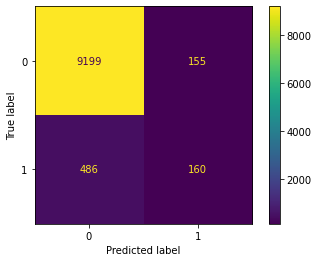

In [64]:
plot_confusion_matrix(classifier, X_test, y_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9354
           1       0.51      0.25      0.33       646

    accuracy                           0.94     10000
   macro avg       0.73      0.62      0.65     10000
weighted avg       0.92      0.94      0.93     10000



## 6. Plot ROC curve and caculate AUC score (Performance metric)

In [58]:
y_pred_p = classifier.predict_proba(X_test)    ## Predict the probability of being a fraud
print(y_pred_p)
print(y_pred)

[[0.97707226 0.02292774]
 [0.98206456 0.01793544]
 [0.90796365 0.09203635]
 ...
 [0.98644369 0.01355631]
 [0.99667209 0.00332791]
 [0.73572098 0.26427902]]
[0 0 0 ... 0 0 0]


In [59]:
def column(matrix, i):
    return [row[i] for row in matrix]

y_pred_p1=column(y_pred_p , 1)  ## keep the second column of probability being a fraud (1)

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_p1)
print('AUC: %.4f' % auc) 
fpr, tpr, _ = roc_curve(y_test, y_pred_p1)

ns_probs = [0 for _ in range(len(y_pred_p1))]
ns_auc = roc_auc_score(y_test , ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test , ns_probs)

AUC: 0.9427


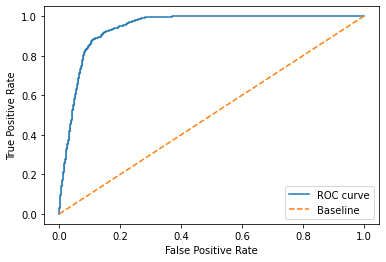

In [61]:
# plot the roc curve for the model
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='ROC curve', markersize=.1)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', markersize=.1)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

fig1 = pyplot.gcf()
# show the plot
pyplot.show()